## tissue domains resolved with each cluster of genes identified by scGCO for layer 2

In [1]:

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


import scGCO
from scGCO import *

In [2]:
known_SV_genes=['FN1', 'SPARC', 'POSTN', 'COL1A1', 'RPS18', 'RPL13', 'PRSS23',
     'RPN2', 'IGFBP5']
len(known_SV_genes)

9

In [4]:
j=2
unary_scale_factor=100
label_cost=10
algorithm='expansion'
ff = '../../data/Raw_data/MOB-breast-cancer/Layer' + str(j) +  '_BC_count_matrix-1.tsv'
locs,data=read_spatial_expression(ff,sep='\t')

data_norm = normalize_count_cellranger(data)
print('Rep{}_processing: {}'.format(j,data_norm.shape))

raw data dim: (251, 14789)
Rep2_processing: (248, 13495)


In [5]:
fileName="../../data/BreastCancer/scGCO_results/Layer"+str(j)+"_BC_result_df.csv"
result_df=read_result_to_dataframe(fileName)

fileName="../../data/BreastCancer/scGCO_results/Layer"+str(j)+"_BC_pattern_conserved_df.csv"
pattern_conserved_df=read_result_to_dataframe(fileName)

fileName="../../data/BreastCancer/scGCO_results/Layer"+str(j)+"_BC_pattern_conserved_df_exp.csv"
pattern_conserved_df_exp=read_result_to_dataframe(fileName)

fileName="../../data/BreastCancer/scGCO_results/Layer" + str(j) + "_BC_tsne_proj_gene_df.csv"
tsne_proj_gene_df=pd.read_csv(fileName,index_col=0)

## t-SNE genes scatter plot

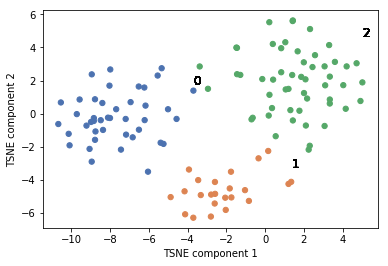

In [6]:
final_labels = tsne_proj_gene_df.cluster.values
final_tsne = tsne_proj_gene_df.values

palette = sns.color_palette('deep', final_labels.max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in final_tsne[:,2].astype(int)]
plt.scatter(final_tsne[:,0], final_tsne[:,1], c=colors, s=28)
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
for i in final_labels:
    position = np.max(final_tsne[ final_tsne[:,2]== i], axis=0)
    plt.gcf().gca().text(position[0], position[1]-1,str(i), fontsize=12)
# if fileName != None:
#     plt.savefig(fileName,format="pdf",dpi=300)
plt.show()

## TSNE tissue structure

In [7]:
image=("../../data/Raw_data/HE-MOB-breast-cancer/HE_layer2_BC.jpg")

(118, 2)


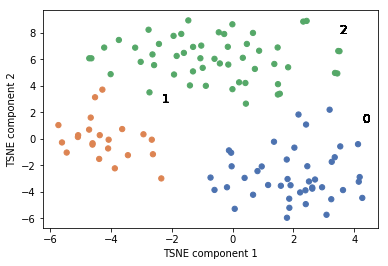

In [8]:
gene_lists=pattern_conserved_df_exp.index
marker_genes=["FN1","PRSS23","RPS18"]
fileName=None
tsne_proj_gene_df=spatial_pca_tsne_kmeans_cluster_gene(data_norm,gene_lists,marker_genes,perplexity=30,fileName=fileName)

## Figure 2e: Tissues structures resolved with each cluster of SV genes

[ 77. 118.  53.]


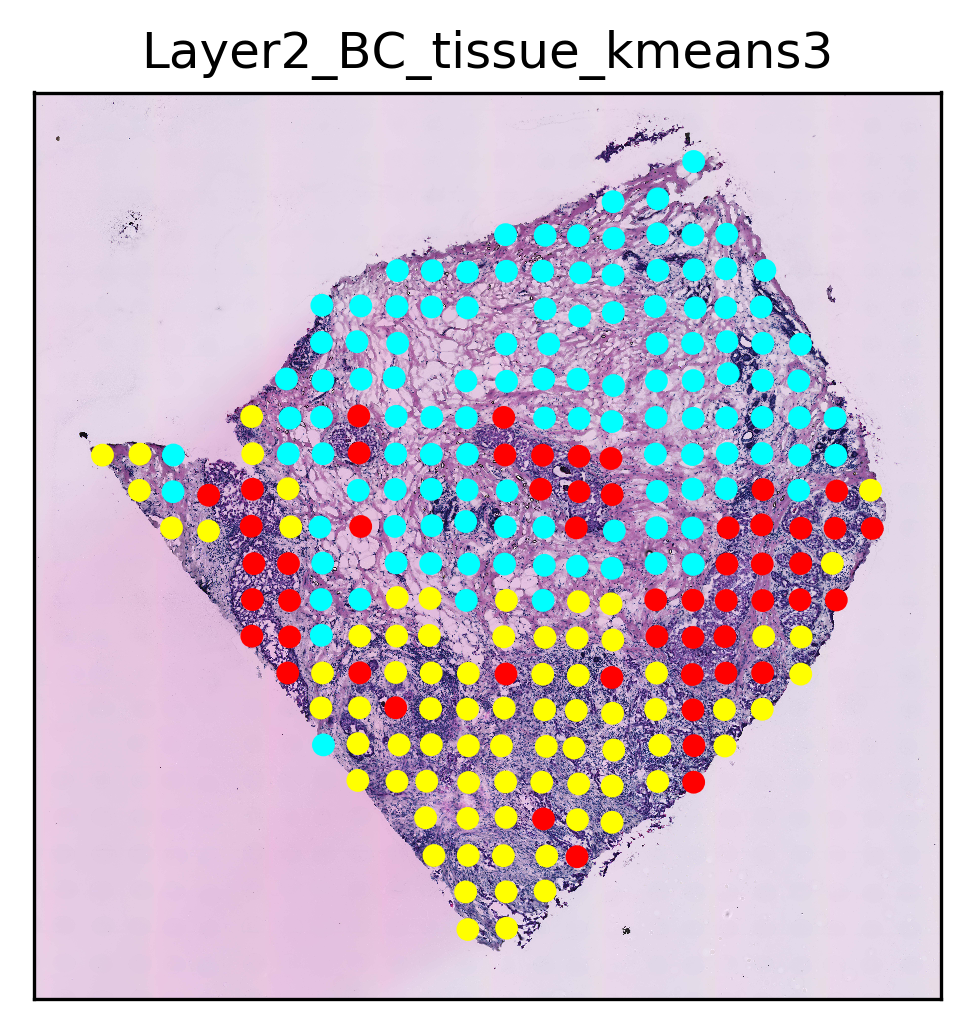

In [10]:
# compare the three sets of predictions to tissue structure
# step 1
# create three vects for tissue structure

cluster_gene=pattern_conserved_df_exp.index
exp =  data_norm.iloc[:,1]
exp=(log1p(exp)).values
cellGraph = create_graph_with_weight(locs, exp) 
X=log1p(data_norm.loc[:, cluster_gene])
kmeans=KMeans(n_clusters=3,random_state=0).fit(X)
hmrf_tissue3_labels = cut_graph_profile(cellGraph, kmeans.labels_, unary_scale_factor=100, 
                      smooth_factor=10)

uniq_tissue3, count_tissue3 = np.unique(hmrf_tissue3_labels, return_counts = True)
tissue3_mat_list = list()
for tm_index in np.arange(len(uniq_tissue3)):
    temp_vec = np.zeros(hmrf_tissue3_labels.shape[0])
    temp_vec[np.where(hmrf_tissue3_labels == uniq_tissue3[tm_index])[0]] = 1       
    tissue3_mat_list.append(temp_vec)
tissue3_mat = np.array(tissue3_mat_list)
print(np.sum(tissue3_mat, axis=1))

fig,ax=plt.subplots(dpi=300)
add_HE_image(image,ax)
colors = ["yellow","cyan","red"]

ax.scatter(locs[:,0], locs[:,1], c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors),s=20)

points=locs
p_dist = cdist(points, points)    
p_dist[p_dist == 0] = np.max(p_dist, axis = 0)[0]
norm_dist = np.mean(np.min(p_dist, axis = 0))

# find points at edge, add three layers of new points 
x_min = np.min(points, axis = 0)[0] - 3*norm_dist
y_min = np.min(points, axis = 0)[1] - 3*norm_dist
x_max = np.max(points, axis = 0)[0] + 3*norm_dist
y_max = np.max(points, axis = 0)[1] + 3*norm_dist

ax.set_xlim(x_min + norm_dist, x_max - norm_dist)
ax.set_ylim(y_min + norm_dist, y_max - norm_dist)
ax.set_title('Layer2_BC_tissue_kmeans3')
ax.set_yticks([])
ax.set_xticks([])
        
plt.savefig("../../figures//Figure2e_Layer2_BC_tissue_kmeans3.pdf",format="pdf",dpi=300)
plt.show()

## Supplementary Figure 11a: issue domains resolved with each cluster of genes identified by scGCO for layer 2

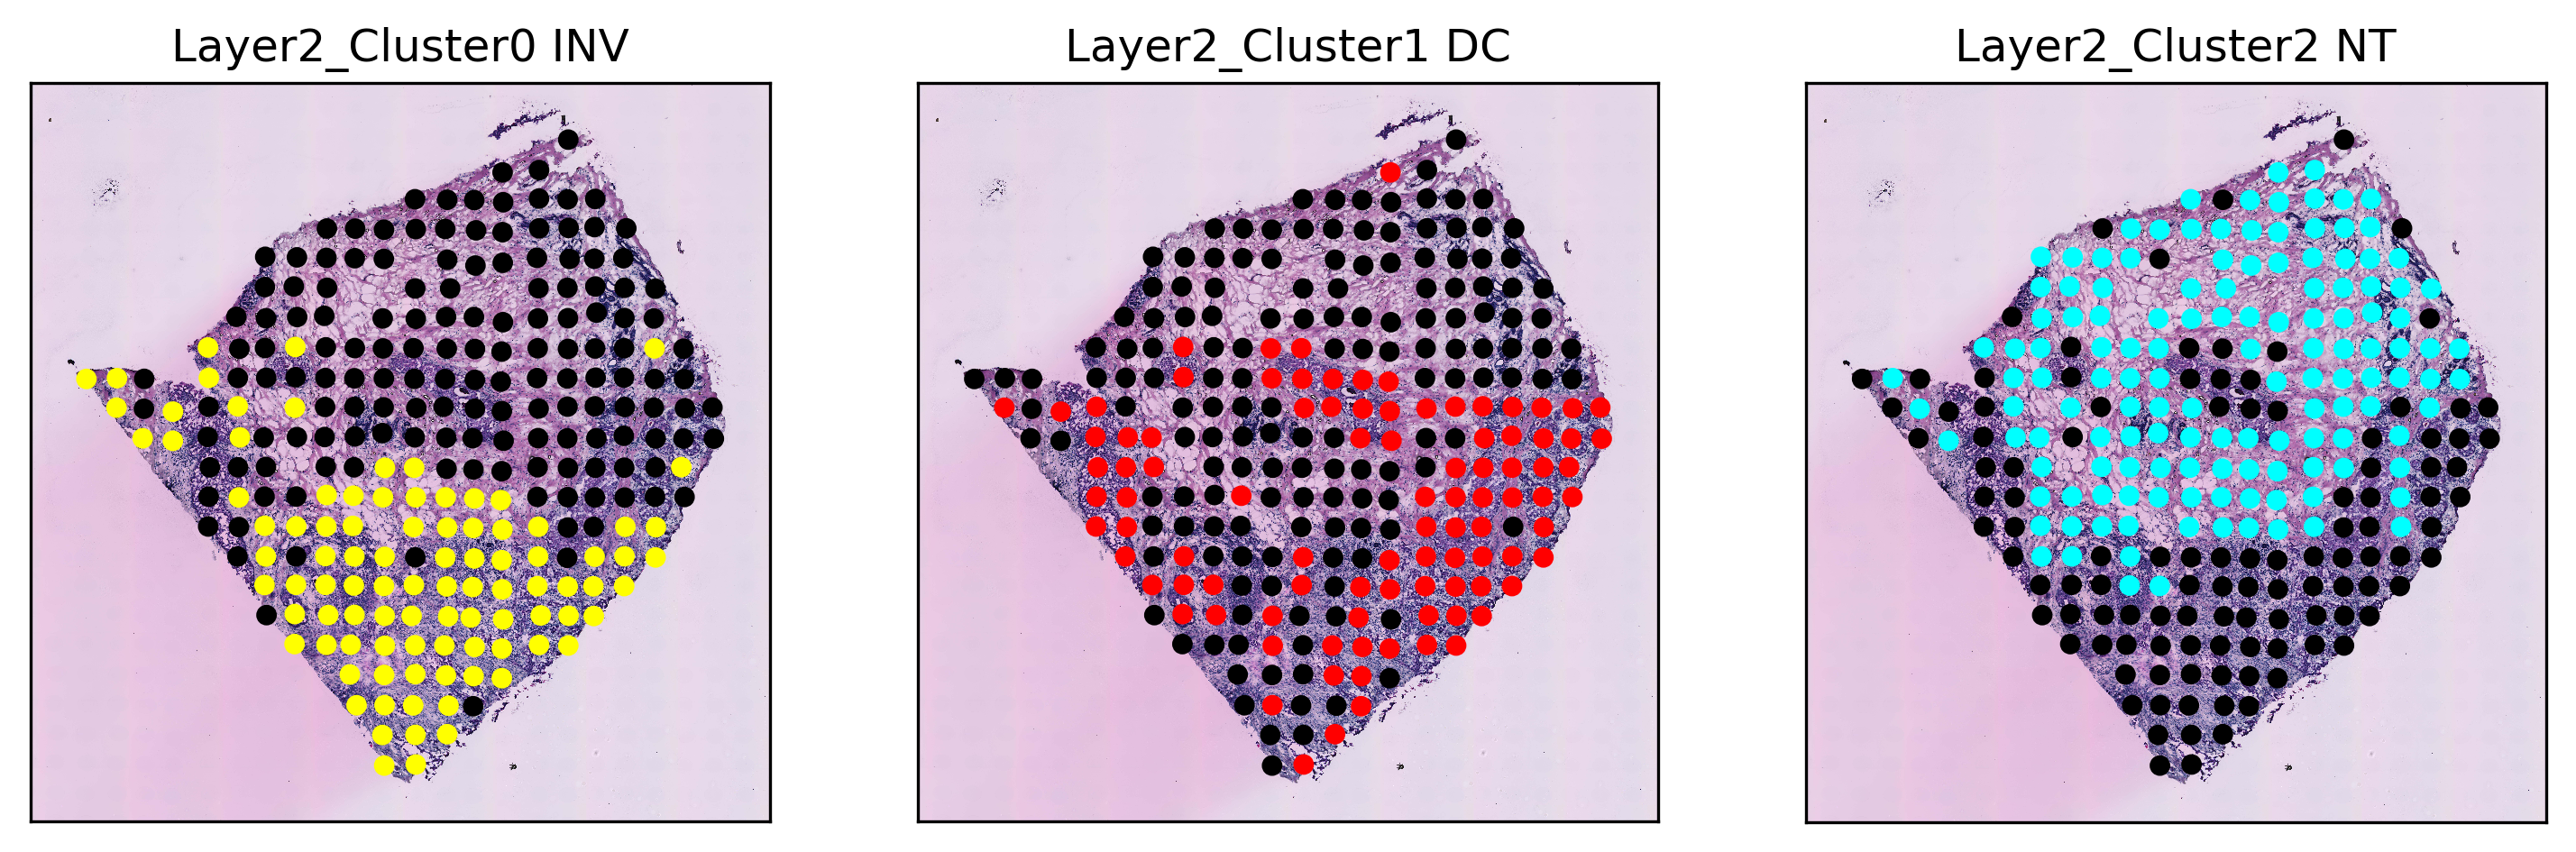

In [11]:
ncows=len(tsne_proj_gene_df["cluster"].unique())
fig,ax=plt.subplots(1,ncows,figsize=(ncows*4,1*4),dpi=300)
for (uu, group) in tsne_proj_gene_df.groupby("cluster"):
        gene_subset =group.index
        
        X=log1p(data_norm.loc[:,gene_subset])
        kmeans=KMeans(n_clusters=2,random_state=0).fit(X)
        #hmrf_labels = cut_graph_profile(cellGraph, kmeans.labels_, unary_scale_factor=100, 
#                       smooth_factor=35)
#         uniq, count = np.unique(hmrf_labels, return_counts = True)
        
        if uu==0:
            texttitle="Layer2_Cluster"+str(uu)+ " INV"
            colors = ['yellow','k']
            #cluster0=hmrf_labels
            
        elif uu==1:
            texttitle="Layer2_Cluster"+str(uu)+ " DC"
            colors = ['k','red']
            #cluster1=1-hmrf_labels
        
        elif uu==2:
            texttitle="Layer2_Cluster"+str(uu)+ " NT"
            colors=["cyan","k"]
        #colors=["C" + str(i) for i in range(3)]
        
        add_HE_image(image,ax[uu])
        ax[uu].scatter(locs[:,0], locs[:,1], c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors),s=20)
    
        points=locs
        p_dist = cdist(points, points)    
        p_dist[p_dist == 0] = np.max(p_dist, axis = 0)[0]
        norm_dist = np.mean(np.min(p_dist, axis = 0))

# find points at edge, add three layers of new points 
        x_min = np.min(points, axis = 0)[0] - 3*norm_dist
        y_min = np.min(points, axis = 0)[1] - 3*norm_dist
        x_max = np.max(points, axis = 0)[0] + 3*norm_dist
        y_max = np.max(points, axis = 0)[1] + 3*norm_dist

        ax[uu].set_xlim(x_min + norm_dist, x_max - norm_dist)
        ax[uu].set_ylim(y_min + norm_dist, y_max - norm_dist)
        ax[uu].set_title(texttitle)
        #ax[uu].set_title("")
        ax[uu].set_yticks([])
        ax[uu].set_xticks([])
fig.savefig("../../figures//Suppl_Figure11a_Layer2_BC_tsne_genes_kmeans_2.pdf",format="pdf",dpi=300)

## Figure 2f: Representative graph cuts and H&E staining overlays for scGCO genes (layer 2)

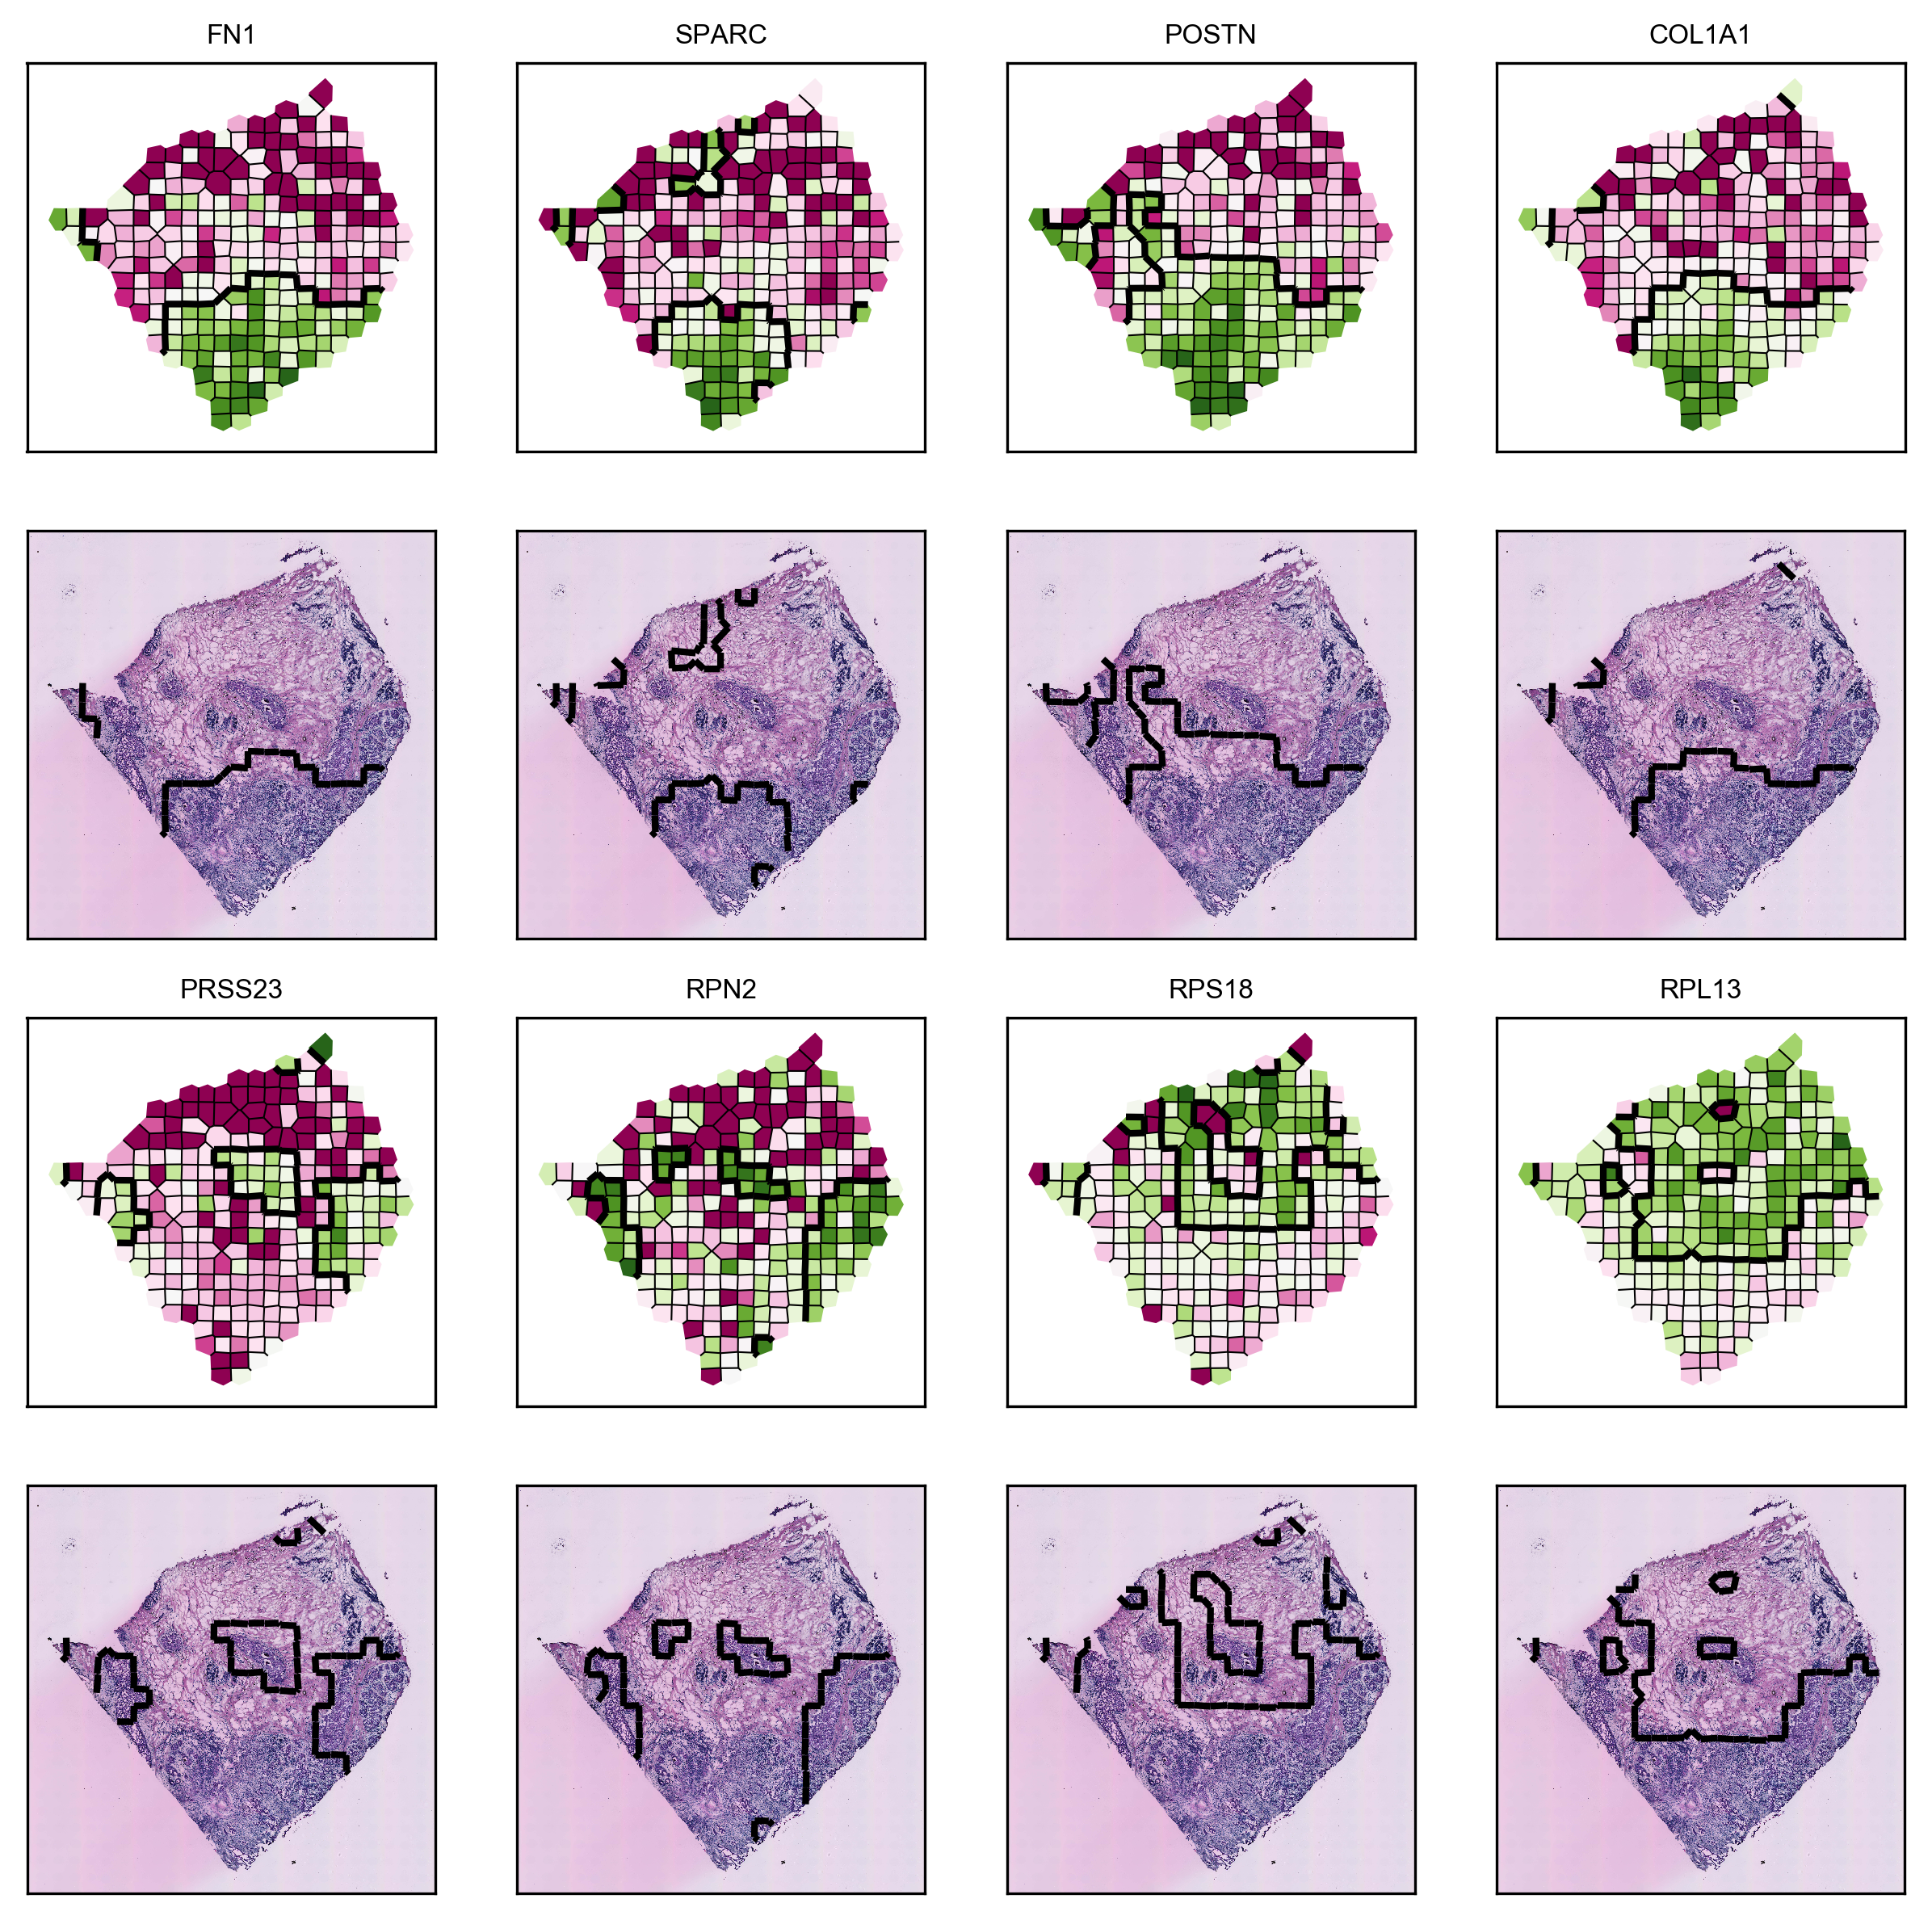

In [12]:
#TSNE 0
tsne0_genes=["FN1","SPARC","POSTN","COL1A1"]

from PIL import Image
fig,ax=plt.subplots(4,4,dpi=300,gridspec_kw={"height_ratios":[1,1.05,1,1.05]},figsize=(10,10))
# fig.subplots_adjust(hspace=0.3, wspace=0.3,
#                             top=0.925, right=0.925, bottom=0.075, left = 0.075)


for i ,geneID in enumerate(tsne0_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    p=result_df.loc[geneID,"p_value"]
    axes=ax[0][i]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=8)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[1][i]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])

tsne1_genes=["PRSS23","RPN2"]
for i ,geneID in enumerate(tsne1_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    p=result_df.loc[geneID,"p_value"]
    axes=ax[2][i]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=8)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[3][i]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])

tsne2_genes=["RPS18","RPL13"]
for i ,geneID in enumerate(tsne2_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    p=result_df.loc[geneID,"p_value"]
    axes=ax[2][i+2]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=8)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[3][i+2]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])
fig.savefig("../../figures//Figure2f_Layer2_BC_tsne_genes.pdf",format="pdf",dpi=300)